# Classical Ising model
This notebook demonstrates the Monte Carlo study on the 2-d classical Ising model. 

Last modified: Menghan Song and Ting-Tung Wang, Nov 2022.

## 1. Introduction

### 1.1 Hamiltonian

Classical Ising model describe a system consist of certain configuration of spins, where only the nearest neighbor have nonzero interaction. The Hamiltonian (Energy) of the classical Ising model is given by, 
$$
 H(\{\sigma\})=-J\sum_{\langle i,j\rangle} \sigma_i\sigma_j
$$

The angle bracket under the first summation indicates that only the nearest neighbor $i$ and $j$ are considered. $\sigma_i $ and $ \sigma_j$ only take two values, +1 and -1, indicating a spin-1/2 partivle with two $S_z$ components (up and down).

$J>0$ implies that spins tend to stays in the same direction, so as to achieve a lower energy, in which case the system is like a ferromagnetic material. By contrast, $J<0$ represents anti-ferromagnetic model.



### 1.2 Partition function

In the two dimension classical Ising model, we assume there are some spin live on a square lattice with length $L$, then the total number of spins would be $N=L^2$.  Because of nearest interaction and periodic boundary condition, there are totally $2N$ interaction, or bond, on the lattice.

Consider the partition function:
$$
Z=\sum_{\{\sigma\}}e^{-\beta E\{\sigma\}}
$$
where $\beta$ is the thermaldynamic beta $\beta=\frac{1}{k_BT}$, with $k_B$ being the Boltzmann constant and $T$ being the temperature.  In the following parts, we assume $k_B=1$ and $\beta=\frac{1}{T}$ simply is the inverse of temperature.  $\beta$ and $T$ will be used interchangeably.

The partition function shows the weighting of each configuration and the probability of such configuration's occurring.
$$
P(\{\sigma\})=\frac{1}{Z}e^{-\beta E\{\sigma\}}
$$
where $Z$ acts as a normalization constant, making sure that the sum of probability of all the configurations equals to 1.  It is obvious that the weighting of any configuration has a negative correlation with the total energy of that configuration, in other words, a system is more likely to stay at lower energy rather than at higher one.

## 2. Monte Carlo Method

Consider a large ensemble of configurations of a certain system, $C=C_1,C_2,...,C_N$. A stochastic process is designed such that the current configuration $C_k$ is generated from the previous one $C_{k-1}$ by making some changes. This sequence of configurations is called a Markov chain. With a given stable distribution $W(C)$, it is our mission to find out the transition probability, $P(C_i\to C_j)$. Given an ensemble distributed according to $W(C)$, one can derive the ***detailed balanced condition***,
$$
\frac{P(C_i\to C_j)}{P(C_j\to C_i)}=\frac{W(C_j)}{W(C_i)}.
$$


With well-defined transition probabilities and distribution $W(\{\sigma\})=\frac{1}{Z}e^{-\beta E\{\sigma\}}$, one can generate configurations along a Markov chain. The expectation value of a certarin measurable $Q$ is,
$$
\langle Q⟩=\sum_{\sigma}W(\sigma)Q(\sigma) = \frac{1}{N}\sum_{i=1}^{N}Q(C_i),
$$
where $N$ is the total number of sampling we do.

## 3. Algorithms

### 3.1 The Metropolis algorithm

Metropolis algorithm is also known as local update. Recall the detailed balanced condition 
$$
\frac{P(C_i\to C_j)}{P(C_j\to C_i)}=\frac{W(C_j)}{W(C_i)}.
$$
We further write $P(C_i\to C_j)=P^{choose}(C_i\to C_j)P^{accept}(C_i\to C_j)$. In Metropolis algorithm, $P^{choose}(C_i\to C_j)$ is a constant and $P^{accept}(C_i\to C_j) = \min\left \{ \frac{W(C_j)}{W(C_i},1 \right \}$. This piece of choice satisefies the detailed balanced condition and we can implement this as follows.
1. Initialize the lattice $\left \{ S_i\right \}$ (randomly generate a configuration among {±1, ±1, ..., ±1} as the initial configuration). Set the lattice size L and the temperature T.
2. Randomly choose a spin. Consider flipping the spin $S_i$ to $-S_i$, calculated the change of energy $\Delta E$ of the system.
3. The flip is accepted with the probability $P^{accept}$ shown above. In detail, if the flip lowers the energy of the system i.e., $\Delta E<0$, we always accept the flip. Otherwise, flip the spin with $P=e^{-\beta \Delta E}$.
4. Consider $L × L$ times of step 2-3 as one Monte Carlo iteration and monitor the behavior of physical observables.
5. Repeat step 2-4 until the physical observable converges after certain iterations. This step is to make sure the system is fully thermalized. 
6. Repeat Monte Carlo steps and record the physical observables each step.



### 3.2 The Wolff algorithm

The Wolff algorithm is also named as cluster update. It is an analogy to the real physical system near the critical point where spins seem to form clusters. In the algorithm, spins form a cluster with some probability and the entire cluster is flipped with $P^{accept}=1$.
The steps are below:
1. Initialize the lattice $\left \{ S_i\right \}$ (randomly generate a configuration among {±1, ±1, ..., ±1} as the initial configuration). Set the lattice size L and the temperature T.
2. Start the Monte Carlo step, a spin $S_i$ is selected at random.
3. All its neighbors $S_j$s, are added to the cluster with a probability $P=1-e^{-2\beta J}$,provided $S_i$ and $S_j$ are parallel and the bond between them has not been considered before.
4. For the newly added spin, repeat the step 3 until no new spins are added into the cluster. Flip all the spins in the cluster, which ends one Monte Carlo step. 
5. Repeat step 2-4 until the physical observable converges after certain iterations. 
6. Repeat Monte Carlo steps and record the physical observables each step.  


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import random

In [2]:
def initialize(L):
    neighbor=np.zeros([d,4], dtype=int)
    for i in range(d):
        x=np.floor(i/L)
        y=i%L
        neighbor[i,0]=y*L+(x+1)%L      #right
        neighbor[i,1]=y*L+(x-1)%L      #left
        neighbor[i,2]=((y+1)%L)*L+x    #up
        neighbor[i,3]=((y-1)%L)*L+x    #down
    h=random.randint(2,size=(d))
    return h, neighbor

In [3]:
def update_Metropolis(h):
    for site in range(d):
        n=0
        for i in range(4):
            if h[site]==h[neighbor[site,i]]:
                n+=1
        if random.random()<P[n]:
            h[site]=1-h[site]
    return h

In [4]:
def measure(h):
    mz=0
    for site in range(d):
        mz+=h[site]*2-1
    mz=abs(mz/d)
    mz2=mz**2
    return mz, mz2

In [5]:
Nt=int(1e4)
Nm=int(3e4)
I=10
J=1
L_list=[4, 8, 16]
T_list=np.arange(0.1,3.1,0.2)
T_list=-np.sort(-T_list)    #reversed sort
mz_mean=np.zeros([np.size(L_list), np.size(T_list)])
mz2_mean=np.zeros([np.size(L_list), np.size(T_list)])


In [6]:
for i, L in enumerate(L_list):
    d=L**2
    h, neighbor=initialize(L)
    for j, T in enumerate(T_list):
        P=[]
        for n in range(5):
            dE=(4*n-8)*J
            P.append(np.exp(-dE/T))
        mz_list=[]
        mz2_list=[]
        if j==0:
            for k in range(Nt):
                h=update_Metropolis(h)
        for k in range(Nm):
            h=update_Metropolis(h)
            if k%I==0:
                mz_temp,mz2_temp=measure(h)
                mz_list.append(mz_temp)
                mz2_list.append(mz2_temp)
        mz_mean[i,j]=np.mean(mz_list)
        mz2_mean[i,j]=np.mean(mz2_list)

KeyboardInterrupt: ignored

Text(0, 0.5, '$|m|$')

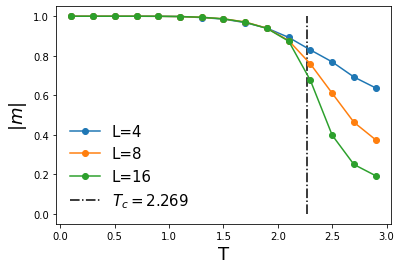

In [ ]:
for i in range(np.size(L_list)):
    plt.plot(T_list,mz_mean[i,:],marker="o",label="L="+str(L_list[i]))
plt.vlines(2.269,0,1,linestyles='-.',label="$T_c=2.269$")
plt.legend(frameon=False,fancybox=True,numpoints=1,prop = {'size':15,'family':'Times New Roman'})
plt.xlabel("T",fontsize=18,fontname='Times New Roman')
plt.ylabel("$|m|$",fontsize=18,fontname='Times New Roman')

In [ ]:
def update_Wolff(h):
    notvisit=list(range(d))
    stack=[random.randint(d)]
    notvisit.remove(stack[0])
    while not not stack:
        seed=stack[0]
        stack.remove(seed)
        for i in range(4):
            if neighbor[seed,i] in notvisit and h[seed]==h[neighbor[seed,i]] and random.random()<bprob:
                stack.append(neighbor[seed,i])
                notvisit.remove(neighbor[seed,i])
        h[seed]=1- h[seed]
    return h

In [ ]:
Nt=int(1e4)
Nm=int(2e4)
I=5
L_list=[4, 6, 8, 10, 12]
T_list=np.arange(0.1,3.1,0.2)
T_list=-np.sort(-T_list)    #reversed sort
mz_mean=np.zeros([np.size(L_list), np.size(T_list)])
mz2_mean=np.zeros([np.size(L_list), np.size(T_list)])

for i, L in enumerate(L_list):
    print("L=",L)
    d=L**2
    h, neighbor=initialize(L)
    for j, T in enumerate(T_list):
        bprob=1-np.exp(-2*J/T)
        mz_list=[]
        mz2_list=[]
        if j==0:
            for k in range(Nt):
                h=update_Wolff(h)
        for k in range(Nm):
            h=update_Wolff(h)
            if k%I==0:
                mz_temp,mz2_temp=measure(h)
                mz_list.append(mz_temp)
                mz2_list.append(mz2_temp)
        mz_mean[i,j]=np.mean(mz_list)
        mz2_mean[i,j]=np.mean(mz2_list)

L= 4
L= 6
L= 8
L= 10
L= 12


Text(0.5, 1.0, 'Wolff')

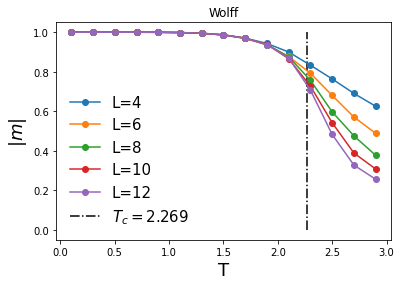

In [ ]:
for i in range(np.size(L_list)):
    plt.plot(T_list,mz_mean[i,:],marker="o",label="L="+str(L_list[i]))
plt.vlines(2.269,0,1,linestyles='-.',label="$T_c=2.269$")
plt.legend(frameon=False,fancybox=True,numpoints=1,prop = {'size':15,'family':'Times New Roman'})
plt.xlabel("T",fontsize=18,fontname='Times New Roman')
plt.ylabel("$|m|$",fontsize=18,fontname='Times New Roman')
plt.title("Wolff")

## 4. Fintie size scaling

In principle, for a system in thermal dynamic limit (system size tends to infinity) with continuous phase transition, the order parameter vanishes at one side of the critical point. Also, the second order derivatives of thermal dynamic functions, such as heat capacity, susceptibility have a singularity (diverge to infinity) at the critical point.  

For Ising model, the order parameter, $\langle |m|\rangle$ is zero at $T>T_c$ if we consider a system with infinite size. However, for a finite system size, $\langle |m|\rangle$ will not vanish, for instead it remains at a nonzero constant for $T>T_c$. Also, the heat capacity and the susceptibility will not diverge to infinity but have a finite peak near $T_c$. Finite-size scaling theory tells that for finite-size systems, the physical measurables depend not only on the temperature but also on the system sizes. For example, the order parameter $\langle |m|\rangle$ scales as,
$$
\langle |m|\rangle(t,L)=L^{-\beta/\nu}g(tL^{1/\nu})
$$
$$
\langle |m|\rangle(t,L)L^{\beta/\nu}=g(tL^{1/\nu})
$$
where $t=\frac{|T-T_c|}{T_c}$, $\beta = 1/8$ and $\nu=1$ are two criticle exponents for 2-d Ising model. If $T=T_c, t=0$, the RHS is $g(0)$ independent of the system size $L$. Therefore, if we plot \langle |m|\rangle(t,L)L^{\beta/\nu} against the temperature for different $L$, curves for different $L$ must intersect as a point $T=T_c$.

Text(0.5, 1.0, 'Data collapse')

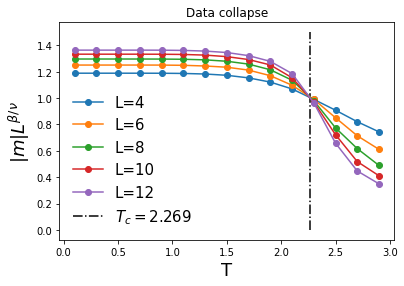

In [ ]:
for i in range(np.size(L_list)):
    plt.plot(T_list,mz_mean[i,:]*L_list[i]**(1/8),marker="o",label="L="+str(L_list[i]))

plt.vlines(2.269,0,1.5,linestyles='-.',label="$T_c=2.269$")
plt.legend(frameon=False,fancybox=True,numpoints=1,prop = {'size':15,'family':'Times New Roman'})
plt.xlabel("T",fontsize=18,fontname='Times New Roman')
plt.ylabel(r"$|m|L^{\beta/\nu}$",fontsize=18,fontname='Times New Roman')
plt.title("Data collapse")


Text(0.5, 1.0, 'Data collapse')

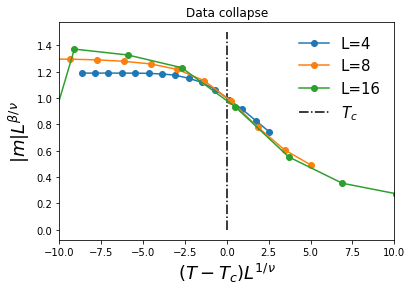

In [12]:
for i in range(np.size(L_list)):
    plt.plot((T_list-2.269)*L_list[i],mz_mean[i,:]*L_list[i]**(1/8),marker="o",label="L="+str(L_list[i]))

plt.vlines(0,0,1.5,linestyles='-.',label="$T_c$")
plt.legend(frameon=False,fancybox=True,numpoints=1,prop = {'size':15,'family':'Times New Roman'})
plt.xlabel(r"$(T-T_c)L^{1/\nu}$",fontsize=18,fontname='Times New Roman')
plt.ylabel(r"$|m|L^{\beta/\nu}$",fontsize=18,fontname='Times New Roman')
plt.xlim(-10,10)
plt.title("Data collapse")